In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
## 1-(a)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

train_data = pd.read_csv('/content/gdrive/MyDrive/Data/Gisette/gisette_train.data', sep = '\s+', header = None)
train_label = pd.read_csv('/content/gdrive/MyDrive/Data/Gisette/gisette_train.labels', sep = '\s+', header = None)
test_data = pd.read_csv('/content/gdrive/MyDrive/Data/Gisette/gisette_valid.data', sep = '\s+', header = None)
test_label = pd.read_csv('/content/gdrive/MyDrive/Data/Gisette/gisette_valid.labels', sep = '\s+', header = None)

scaler = preprocessing.StandardScaler().fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

In [ ]:
target = [10, 30, 100, 300, 500]
train_mis = np.zeros((len(target), 200))
test_mis = np.zeros((len(target), 200))
train_scores = np.zeros((len(target), train_data.shape[0]))
test_scores = np.zeros((len(target), test_data.shape[0]))
loss = np.zeros((len(target), 200))
feanum = np.zeros((len(target), 200))
for j, k in enumerate(target):
  x = train_data.copy()
  y = train_label.to_numpy()
  test_x = test_data.copy()
  test_y = test_label.to_numpy()
  w = np.zeros((train_data.shape[1], 1)).ravel()
  xy = np.multiply(y, x)
  wxy = np.matmul(xy, w)
  for i in range(200):
    # Update step
    fdw = np.multiply((wxy.reshape(-1, 1) - 1.1) / 0.2, xy)
    fdw[wxy > 1.1] = 0
    fdw[wxy < 0.9] = -xy[wxy < 0.9]
    ldw = np.mean(fdw, axis = 0) + 2 * 0.001 * np.linalg.norm(w)
    w = w - 0.1 * ldw

    # Selection step
    m = k + (train_data.shape[1] - k) * max(0, (200 - 2 * i) / (2 * i * 200 + 200))
    ind = np.argsort(w**2)[::-1]
    wsub = np.zeros((x.shape[1],), dtype = bool)
    wsub[ind[:round(m)]] = True
    w = w[wsub]
    x = x[:, wsub]
    test_x = test_x[:, wsub]
    feanum[j, i] = len(w)

    xy = np.multiply(y, x)
    wxy = np.matmul(xy, w)
    L = ((1.1 - wxy)**2) / 0.4
    L[wxy > 1.1] = 0
    L[wxy < 0.9] = 1 - wxy[wxy < 0.9]
    loss[j, i] = np.mean(L) + 0.001 * np.linalg.norm(w)**2
    model = LogisticRegression(fit_intercept = False).fit(x, y.ravel()) # Initialization of the model. No further meaning
    model.coef_ = w
    train_mis[j, i] = (1 - accuracy_score(model.predict(x), y))
    test_mis[j, i] = (1 - accuracy_score(model.predict(test_x), test_y))
    train_scores[j, :] = model.predict_proba(x)[:, 1].ravel()
    test_scores[j, :] = model.predict_proba(test_x)[:, 1].ravel()

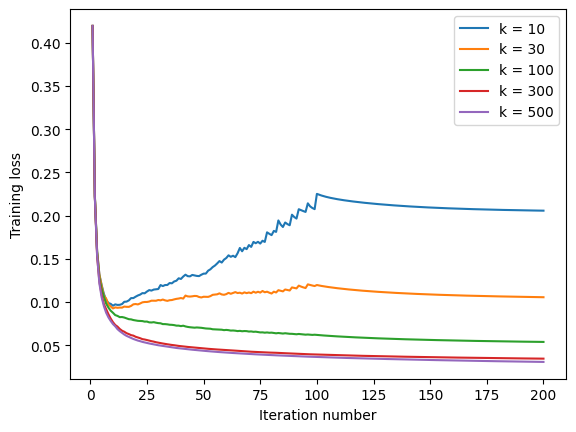

In [ ]:
for i in range(len(target)):
  plt.plot(np.arange(1, 201), loss[i,:])
plt.legend(['k = ' + str(i) for i in target])
plt.xlabel('Iteration number')
plt.ylabel('Training loss')
plt.show()

In [ ]:
print(pd.DataFrame({'k' : target, 'Training misc. error' : train_mis[:, 199], 'Test misc. error' : test_mis[:, 199]}))

     k  Training misc. error  Test misc. error
0   10              0.080833             0.082
1   30              0.038000             0.044
2  100              0.017000             0.027
3  300              0.010833             0.016
4  500              0.009833             0.015


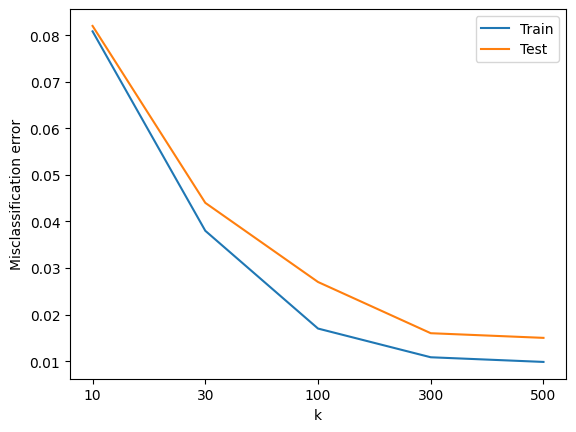

In [ ]:
plt.plot(range(len(target)), train_mis[:, 199])
plt.plot(range(len(target)), test_mis[:, 199])
plt.xticks(range(len(target)), [str(x) for x in target])
plt.xlabel('k')
plt.ylabel('Misclassification error')
plt.legend(['Train', 'Test'])
plt.show()

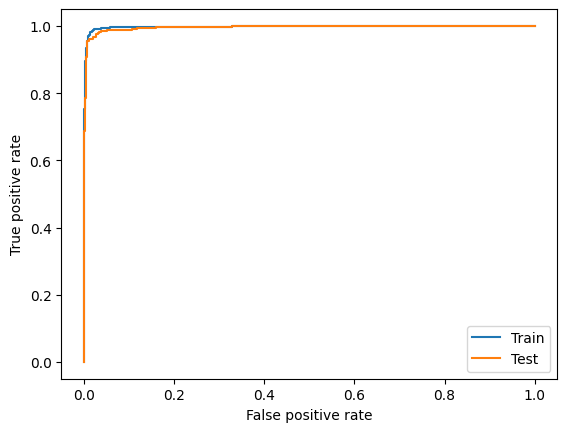

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(train_label, train_scores[2, :])
plt.plot(fpr, tpr)
fpr, tpr, thresholds = roc_curve(test_label, test_scores[2, :])
plt.plot(fpr, tpr)
plt.legend(['Train', 'Test'])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

In [ ]:
## 1-(b)
train_data = pd.read_csv('/content/gdrive/MyDrive/Data/dexter/dexter_train.csv', header = None)
train_label = pd.read_csv('/content/gdrive/MyDrive/Data/dexter/dexter_train.labels', header = None)
test_data = pd.read_csv('/content/gdrive/MyDrive/Data/dexter/dexter_valid.csv', header = None)
test_label = pd.read_csv('/content/gdrive/MyDrive/Data/dexter/dexter_valid.labels', header = None)

scaler = preprocessing.StandardScaler().fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

In [ ]:
target = [10, 30, 100, 300, 500]
train_mis = np.zeros((len(target), 200))
test_mis = np.zeros((len(target), 200))
train_scores = np.zeros((len(target), train_data.shape[0]))
test_scores = np.zeros((len(target), test_data.shape[0]))
loss = np.zeros((len(target), 200))
feanum = np.zeros((len(target), 200))
for j, k in enumerate(target):
  x = train_data.copy()
  y = train_label.to_numpy()
  test_x = test_data.copy()
  test_y = test_label.to_numpy()
  w = np.zeros((train_data.shape[1], 1)).ravel()
  xy = np.multiply(y, x)
  wxy = np.matmul(xy, w)
  for i in range(200):
    # Update step
    fdw = np.multiply((wxy.reshape(-1, 1) - 1.1) / 0.2, xy)
    fdw[wxy > 1.1] = 0
    fdw[wxy < 0.9] = -xy[wxy < 0.9]
    ldw = np.mean(fdw, axis = 0) + 2 * 0.001 * np.linalg.norm(w)
    w = w - 0.1 * ldw

    # Selection step
    m = k + (train_data.shape[1] - k) * max(0, (200 - 2 * i) / (2 * i * 200 + 200))
    ind = np.argsort(w**2)[::-1]
    wsub = np.zeros((x.shape[1],), dtype = bool)
    wsub[ind[:round(m)]] = True
    w = w[wsub]
    x = x[:, wsub]
    test_x = test_x[:, wsub]
    feanum[j, i] = len(w)

    xy = np.multiply(y, x)
    wxy = np.matmul(xy, w)
    L = ((1.1 - wxy)**2) / 0.4
    L[wxy > 1.1] = 0
    L[wxy < 0.9] = 1 - wxy[wxy < 0.9]
    loss[j, i] = np.mean(L) + 0.001 * np.linalg.norm(w)**2
    model = LogisticRegression(fit_intercept = False).fit(x, y.ravel()) # Initialization of the model. No further meaning
    model.coef_ = w
    train_mis[j, i] = (1 - accuracy_score(model.predict(x), y))
    test_mis[j, i] = (1 - accuracy_score(model.predict(test_x), test_y))
    train_scores[j, :] = model.predict_proba(x)[:, 1].ravel()
    test_scores[j, :] = model.predict_proba(test_x)[:, 1].ravel()

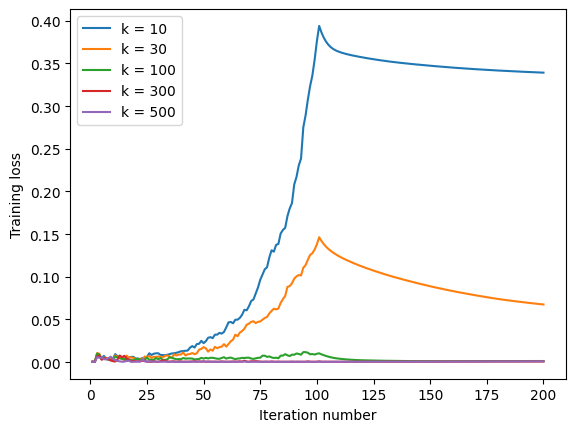

In [ ]:
for i in range(len(target)):
  plt.plot(np.arange(1, 201), loss[i,:])
plt.legend(['k = ' + str(i) for i in target])
plt.xlabel('Iteration number')
plt.ylabel('Training loss')
plt.show()

In [ ]:
print(pd.DataFrame({'k' : target, 'Training misc. error' : train_mis[:, 199], 'Test misc. error' : test_mis[:, 199]}))

     k  Training misc. error  Test misc. error
0   10              0.150000          0.213333
1   30              0.016667          0.193333
2  100              0.000000          0.160000
3  300              0.000000          0.160000
4  500              0.000000          0.180000


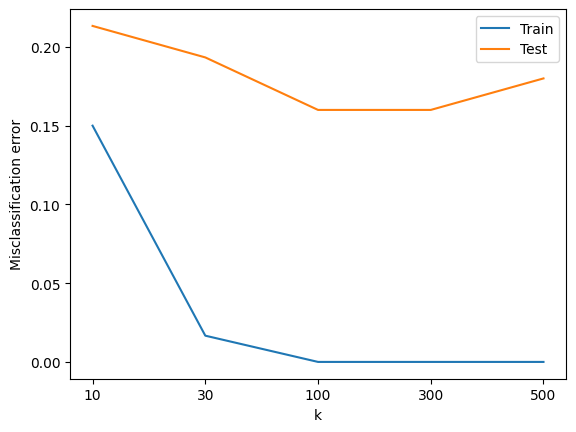

In [ ]:
plt.plot(range(len(target)), train_mis[:, 199])
plt.plot(range(len(target)), test_mis[:, 199])
plt.xticks(range(len(target)), [str(x) for x in target])
plt.xlabel('k')
plt.ylabel('Misclassification error')
plt.legend(['Train', 'Test'])
plt.show()

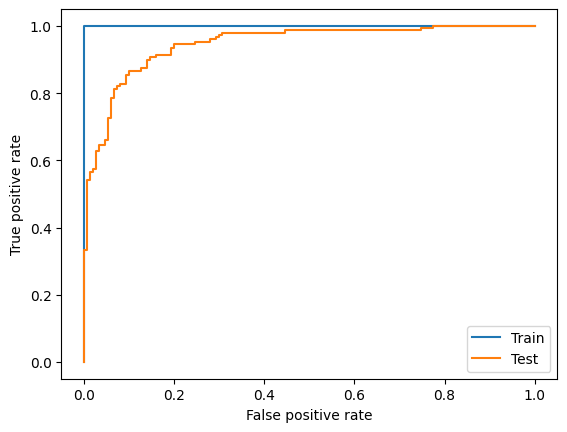

In [ ]:
fpr, tpr, thresholds = roc_curve(train_label, train_scores[2, :])
plt.plot(fpr, tpr)
fpr, tpr, thresholds = roc_curve(test_label, test_scores[2, :])
plt.plot(fpr, tpr)
plt.legend(['Train', 'Test'])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

In [ ]:
## 1-(c)
train_data = pd.read_csv('/content/gdrive/MyDrive/Data/MADELON/madelon_train.data', sep = "\s+", header = None)
train_label = pd.read_csv('/content/gdrive/MyDrive/Data/MADELON/madelon_train.labels', header = None)
test_data = pd.read_csv('/content/gdrive/MyDrive/Data/MADELON/madelon_valid.data', sep = "\s+", header = None)
test_label = pd.read_csv('/content/gdrive/MyDrive/Data/MADELON/madelon_valid.labels', header = None)

scaler = preprocessing.StandardScaler().fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

In [ ]:
target = [10, 30, 100, 300, 500]
train_mis = np.zeros((len(target), 200))
test_mis = np.zeros((len(target), 200))
train_scores = np.zeros((len(target), train_data.shape[0]))
test_scores = np.zeros((len(target), test_data.shape[0]))
loss = np.zeros((len(target), 200))
feanum = np.zeros((len(target), 200))
for j, k in enumerate(target):
  x = train_data.copy()
  y = train_label.to_numpy()
  test_x = test_data.copy()
  test_y = test_label.to_numpy()
  w = np.zeros((train_data.shape[1], 1)).ravel()
  xy = np.multiply(y, x)
  wxy = np.matmul(xy, w)
  for i in range(200):
    # Update step
    fdw = np.multiply((wxy.reshape(-1, 1) - 1.1) / 0.2, xy)
    fdw[wxy > 1.1] = 0
    fdw[wxy < 0.9] = -xy[wxy < 0.9]
    ldw = np.mean(fdw, axis = 0) + 2 * 0.001 * np.linalg.norm(w)
    w = w - 0.1 * ldw

    # Selection step
    m = k + (train_data.shape[1] - k) * max(0, (200 - 2 * i) / (2 * i * 200 + 200))
    ind = np.argsort(w**2)[::-1]
    wsub = np.zeros((x.shape[1],), dtype = bool)
    wsub[ind[:round(m)]] = True
    w = w[wsub]
    x = x[:, wsub]
    test_x = test_x[:, wsub]
    feanum[j, i] = len(w)

    xy = np.multiply(y, x)
    wxy = np.matmul(xy, w)
    L = ((1.1 - wxy)**2) / 0.4
    L[wxy > 1.1] = 0
    L[wxy < 0.9] = 1 - wxy[wxy < 0.9]
    loss[j, i] = np.mean(L) + 0.001 * np.linalg.norm(w)**2
    model = LogisticRegression(fit_intercept = False).fit(x, y.ravel()) # Initialization of the model. No further meaning
    model.coef_ = w
    train_mis[j, i] = (1 - accuracy_score(model.predict(x), y))
    test_mis[j, i] = (1 - accuracy_score(model.predict(test_x), test_y))
    train_scores[j, :] = model.predict_proba(x)[:, 1].ravel()
    test_scores[j, :] = model.predict_proba(test_x)[:, 1].ravel()

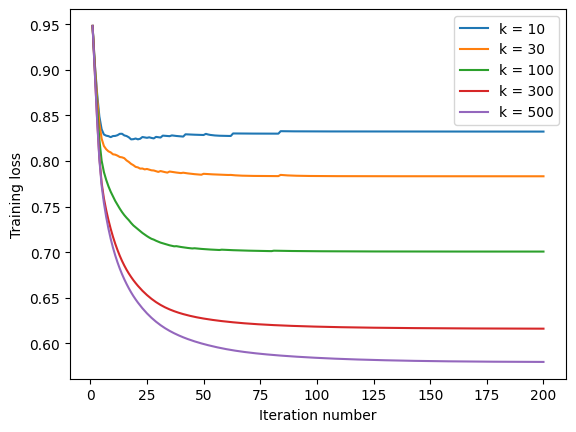

In [ ]:
for i in range(len(target)):
  plt.plot(np.arange(1, 201), loss[i,:])
plt.legend(['k = ' + str(i) for i in target])
plt.xlabel('Iteration number')
plt.ylabel('Training loss')
plt.show()

In [ ]:
print(pd.DataFrame({'k' : target, 'Training misc. error' : train_mis[:, 199], 'Test misc. error' : test_mis[:, 199]}))

     k  Training misc. error  Test misc. error
0   10                0.3760          0.403333
1   30                0.3530          0.416667
2  100                0.3115          0.421667
3  300                0.2580          0.430000
4  500                0.2345          0.425000


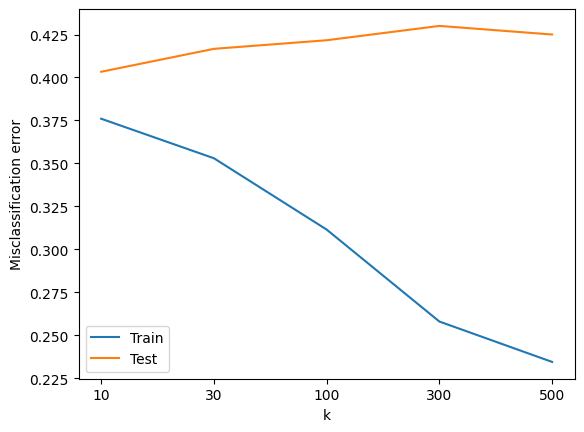

In [ ]:
plt.plot(range(len(target)), train_mis[:, 199])
plt.plot(range(len(target)), test_mis[:, 199])
plt.xticks(range(len(target)), [str(x) for x in target])
plt.xlabel('k')
plt.ylabel('Misclassification error')
plt.legend(['Train', 'Test'])
plt.show()

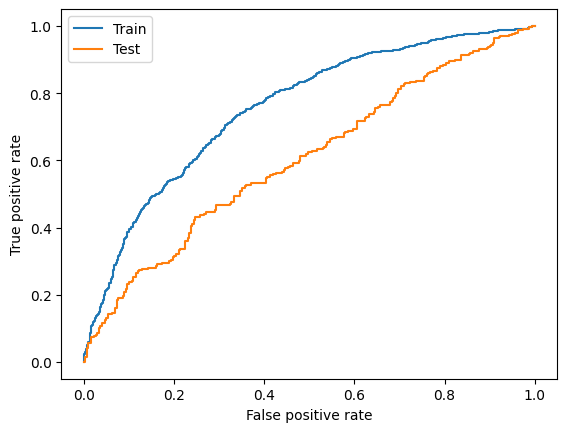

In [ ]:
fpr, tpr, thresholds = roc_curve(train_label, train_scores[2, :])
plt.plot(fpr, tpr)
fpr, tpr, thresholds = roc_curve(test_label, test_scores[2, :])
plt.plot(fpr, tpr)
plt.legend(['Train', 'Test'])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()